###Data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
# load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv('/content/gdrive/MyDrive/Project/marketing analyze/marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

* Rename columns Income
* Đổi kiểu dữ liệu của Income sang float

In [4]:
# clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

# transform Income column to a numerical
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


# Section 01: Exploratory Data Analysis

* Có giá trị null hoặc outliers không? Cách xử lý chúng?
* Có biến nào đòi hỏi các biến đổi không?
* Có biến hữu ích nào có thể tạo ra từ dữ liệu đã cho (vd: profit = sale-cost)?



In [6]:
# missing values
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

* Income có 24 missing values

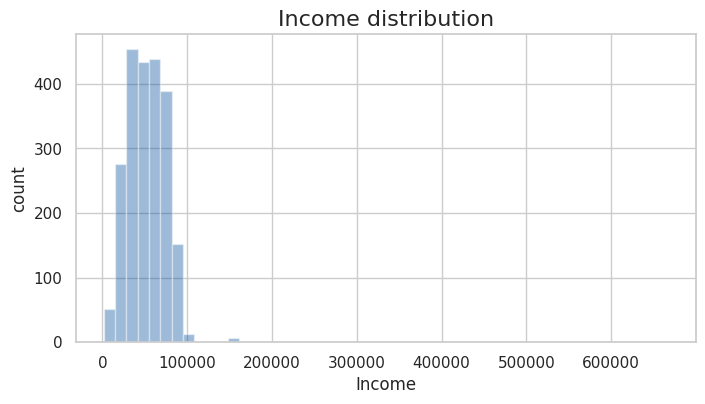

In [7]:
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');

* Income có range từ 0 đến 100k và đổ phổ biến của income ở khoảng giữa (tầm 40k-70k) nên ta sẽ chọn median làm giá trị imputing

In [8]:
df['Income'] = df['Income'].fillna(df['Income'].median())

#### Outliers



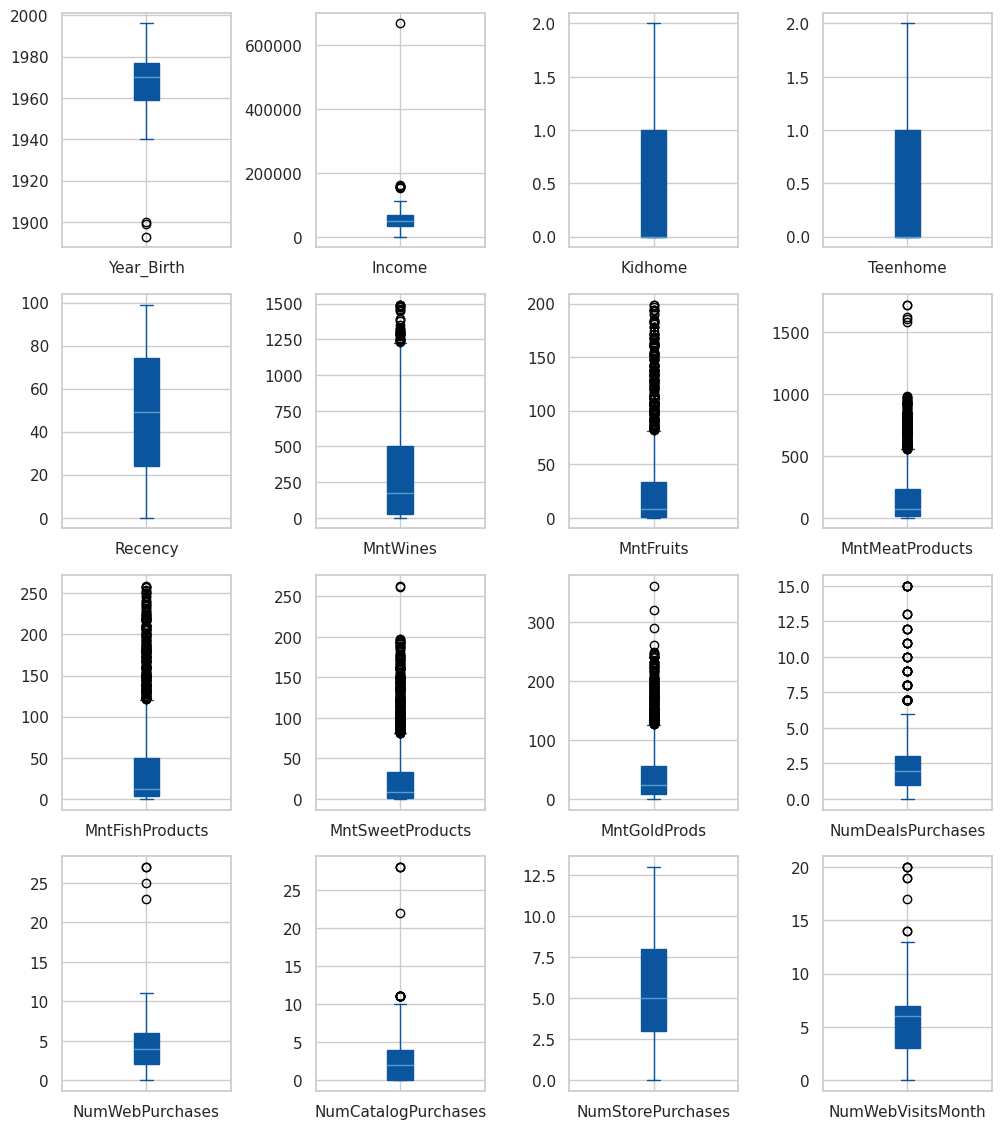

In [9]:

df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

* Bỏ `Year_Birth <= 1900`:

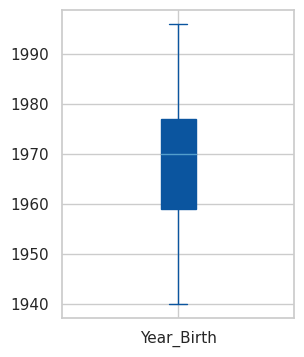

In [10]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
df['Year_Birth'].plot(kind='box', patch_artist=True);

## Đổi kiểu dữ liệu


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

* Đổi kiểu dữ liệu của `Dt_Customer` sang datetime:

In [12]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [13]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [14]:
df['Dependents'] = df['Kidhome'] + df['Teenhome']

df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

# Total Mnt
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' là latest campaign

df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1) 
df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


### EDA



<Axes: >

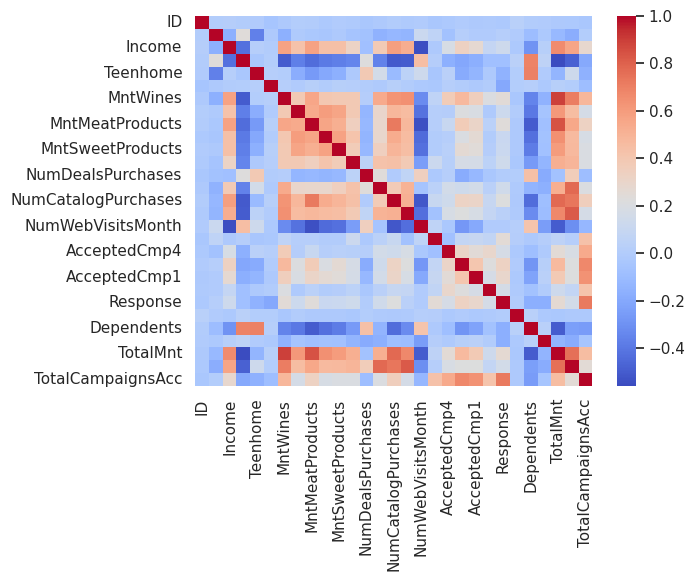

In [15]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)

* Biểu đồ thể hiện tác động của Income lên spend:

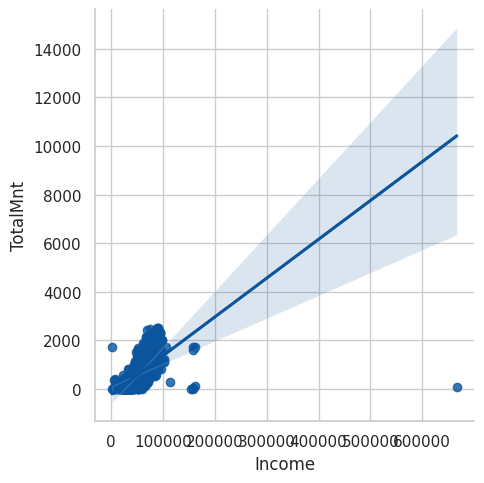

In [17]:
sns.lmplot(x='Income', y='TotalMnt', data=df)

* Vì plot có chứa outliers nên ta sẽ limit nó lại Income < 200000

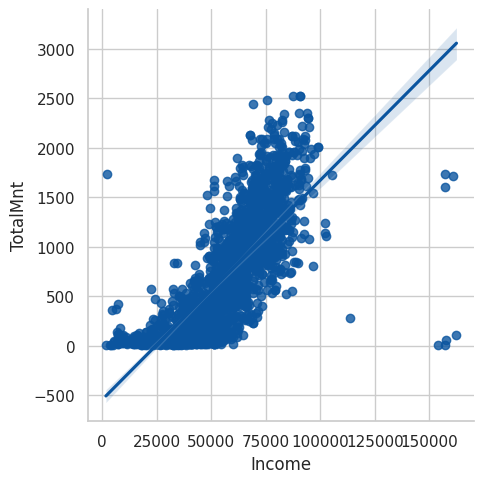

In [45]:
sns.lmplot(x='Income', y = 'TotalMnt', data = df[df['Income']<200000])

*Income có mối quan hệ thuận với TotalMnt => khi khách hàng mua càng nhiều thì chứng tỏ họ có Income lớn

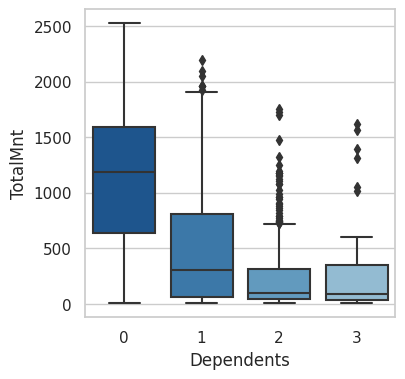

In [19]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=df);

* Biểu đồ thể hiện range của từng dependents đối với TotalMnt:
* Khi khách hàng không có con thì họ sẽ chi nhiều tiền hơn cho việc mua sắm

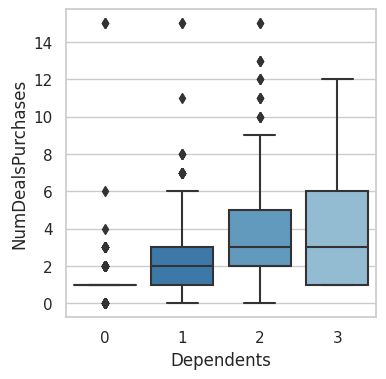

In [20]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df);

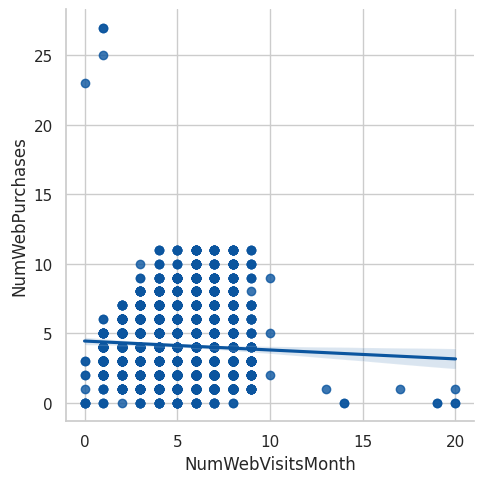

In [21]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df);

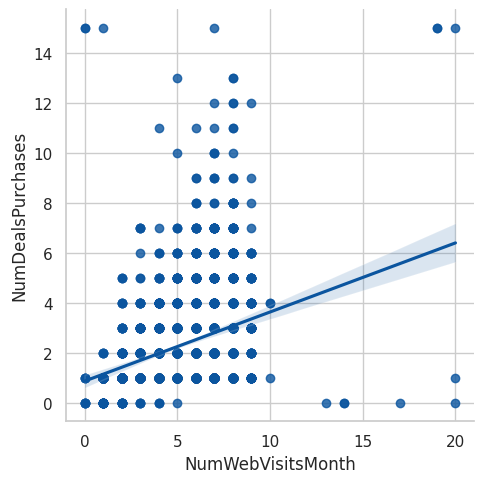

In [22]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df);

* Số lượt truy cập trang web trong tháng trước không có mối tương quan tích cực với số lần mua hàng trên web.
* Thay vào đó, nó có mối tương quan tích cực với số lượng giao dịch được mua, cho thấy rằng các giao dịch đặc biệt là một cách hiệu quả để kích thích mua sắm trên trang web.

# Section 02: Statistical Analysis
* Những yếu tố nào có mối quan hệ đáng kể với số lần mua hàng tại cửa hàng?
* Ở Hoa Kỳ tổng số lần mua hàng cao hơn các nước còn lại không?
* Giả định: những người mua vàng thường thì bảo thủ hơn. Do đó, những người đã chi trên mức trung bình cho vàng trong 2 năm qua sẽ có nhiều lần mua hàng tại cửa hàng hơn. Hãy chứng minh hoặc bác bỏ câu lời tuyên bố này bằng cách sử dụng một kiểm định thống kê thích hợp.
* Cá có chứa axit béo Omega 3 tốt cho não. Vì vậy, liệu "Những người đã kết hôn và đang theo học tiến sĩ" có mối quan hệ đáng kể với số tiền đã chi cho cá không? Những yếu tố nào khác có mối quan hệ đáng kể với số tiền đã chi cho cá? 

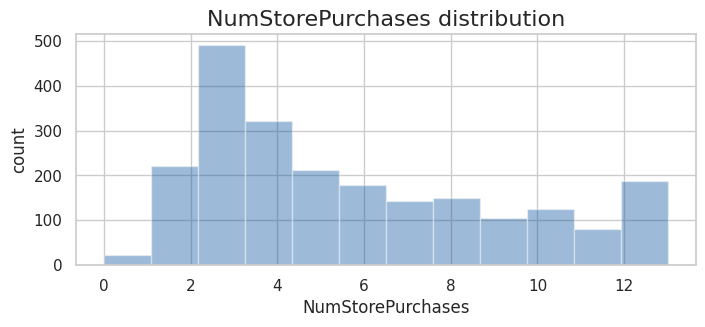

In [23]:
plt.figure(figsize=(8,3))
sns.distplot(df['NumStorePurchases'], kde=False, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count');

### Đâu là các biến (thuộc tính) ảnh hưởng đén việc mua hàng ở store ?  

* Ta sẽ dùng một mô hình hồi quy với NumStorePurchases là biến target để dự báo số lượng mua hàng ở store và lấy được tương quan của từng features đối với biến target này


* Bỏ cột ID không cần thiết vì nó không có tác dụng trong mô hình máy học, và encoding các categorical features

In [24]:
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

In [25]:
from sklearn.preprocessing import OneHotEncoder

cat = df.select_dtypes(exclude=np.number)

enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names_out(cat.columns)

num = df.drop(columns=cat.columns)
df2 = pd.concat([cat_encoded, num], axis=1)
df2.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0,2014,1190,15,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0,2014,577,18,2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,1,2014,251,11,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2,2014,11,4,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,1,2014,91,8,2


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# isolate X and y variables, and perform train-test split
X = df2.drop(columns='NumStorePurchases')
y = df2['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("MSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median: ", y.median())

MSE:  3.239754174836255e-14
Median:  5.0



* Chia tập train, test theo tỉ lệ 7:3 và tiến hành dự báo. => cho ra score (MSE), MSE thấp hơn so với median nên ta có thể cho rằng mô hình này đang hoạt động tốt trên bộ dữ liệu

* Giờ chúng ta sẽ tìm ra các features có ảnh hưởng đến store purchase

In [ ]:
!pip install shap
!pip install eli5

In [28]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)

In [29]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1)
feature_importances = result.importances_mean
feature_names = X_test.columns.tolist()
importances = [(importance, feature) for importance, feature in zip(feature_importances, feature_names)]
importances.sort(reverse=True)
for importance, feature in importances:
    print(f"{feature}: {importance}")

TotalPurchases: 11.870707518645506
NumCatalogPurchases: 1.97760935295303
NumWebPurchases: 1.5717476315258967
NumDealsPurchases: 0.7977262648659605
Year_Customer: 0.0
Year_Birth: 0.0
TotalMnt: 0.0
TotalCampaignsAcc: 0.0
Teenhome: 0.0
Response: 0.0
Recency: 0.0
NumWebVisitsMonth: 0.0
MntWines: 0.0
MntSweetProducts: 0.0
MntMeatProducts: 0.0
MntGoldProds: 0.0
MntFruits: 0.0
MntFishProducts: 0.0
Marital_Status_YOLO: 0.0
Marital_Status_Widow: 0.0
Marital_Status_Together: 0.0
Marital_Status_Single: 0.0
Marital_Status_Married: 0.0
Marital_Status_Divorced: 0.0
Marital_Status_Alone: 0.0
Marital_Status_Absurd: 0.0
Kidhome: 0.0
Income: 0.0
Education_PhD: 0.0
Education_Master: 0.0
Education_Graduation: 0.0
Education_Basic: 0.0
Education_2n Cycle: 0.0
Dependents: 0.0
Country_US: 0.0
Country_SP: 0.0
Country_SA: 0.0
Country_ME: 0.0
Country_IND: 0.0
Country_GER: 0.0
Country_CA: 0.0
Country_AUS: 0.0
Complain: 0.0
AcceptedCmp5: 0.0
AcceptedCmp4: 0.0
AcceptedCmp3: 0.0
AcceptedCmp2: 0.0
AcceptedCmp1: 0.0


* Có 4 features ảnh hưởng đến store purchases: 
  - TotalPurchases: 11.870707518645506
  - NumCatalogPurchases: 1.97760935295303
  - NumWebPurchases: 1.5717476315258967
  - NumDealsPurchases: 0.7977262648659605
    
  

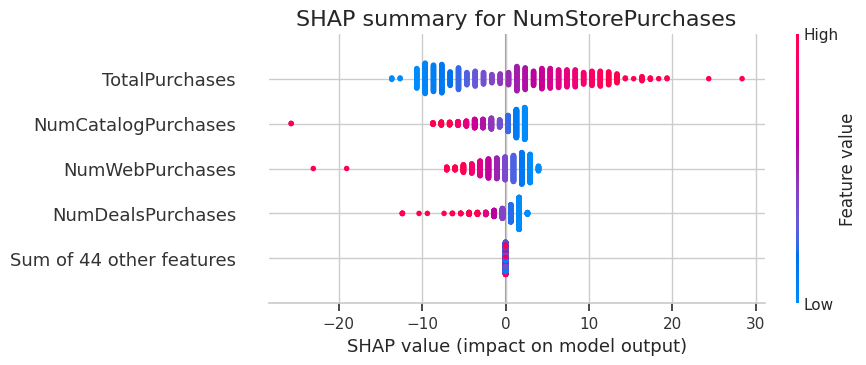

In [30]:
import shap

# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5);

- Số lượng mua hàng tại cửa hàng tăng khi tổng số lần mua hàng ('TotalPurchases') tăng.

- Số lượng mua hàng tại cửa hàng giảm khi số lượng mua hàng qua các kênh catalog, trang web hoặc các ưu đãi ('NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases') tăng: Điều này cho thấy khi khách hàng tham gia mua hàng qua các kênh catalog, trang web hoặc các ưu đãi, khả năng mua hàng tại cửa hàng trực tiếp của họ giảm đi.

- Những xu hướng này cho thấy các mẫu hành vi của khách hàng. Khách hàng có tổng số lần mua hàng cao hơn có khả năng ưa thích mua hàng tại cửa hàng, trong khi những người tham gia nhiều hơn trong việc mua hàng qua các kênh khác như catalog, trang web hoặc các ưu đãi lại có xu hướng giảm sự ưa thích mua hàng tại cửa hàng trực tiếp.

### Ở Hoa Kỳ tổng số lần mua hàng cao hơn các nước còn lại không ?


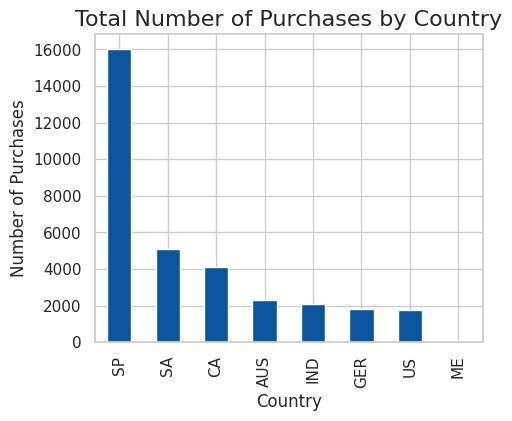

In [31]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases');

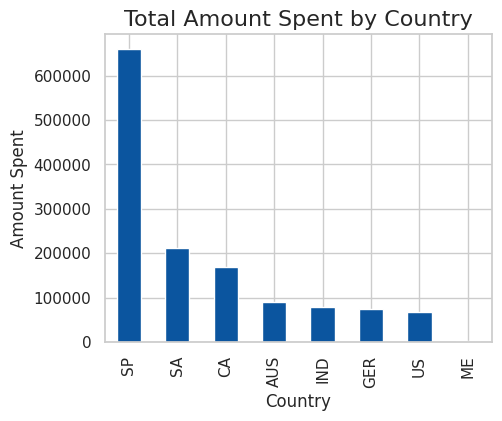

In [32]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalMnt'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Amount Spent by Country', size=16)
plt.ylabel('Amount Spent');

* Về cả số lượng mua hàng lẫn số lượng tiền bỏ ra, thì Spain là nước cao nhất còn Mỹ chỉ xếp thứ 2 từ dưới lên

###Giả định: những người mua vàng thường thì bảo thủ hơn. Do đó, những người đã chi trên mức trung bình cho vàng trong 2 năm qua sẽ có nhiều lần mua hàng tại cửa hàng hơn. Hãy chứng minh hoặc bác bỏ câu lời tuyên bố này bằng cách sử dụng một kiểm định thống kê thích hợp.


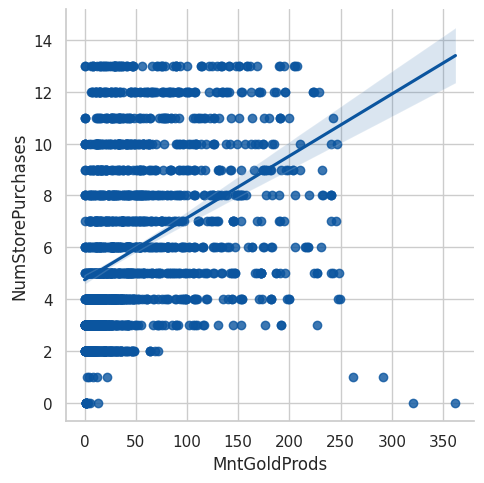

In [33]:
sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data = df);

In [34]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=df['MntGoldProds'], y=df['NumStorePurchases'])

# print results
print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


* Có mối tương quan tốt giữa việc mua vàng với việc mua hàng tại store

### Cá có chứa axit béo Omega 3 tốt cho não. liệu "những người đã kết hôn và đang theo học tiến sĩ" có mối quan hệ đáng kể với số tiền đã chi cho cá không?


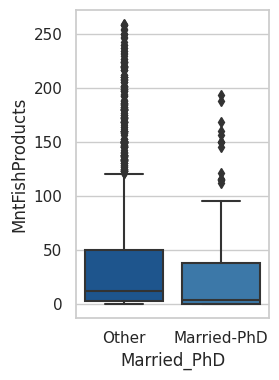

In [35]:
# sum the marital status and phd dummy variables - the Married+PhD group will have value of 2
df2['Married_PhD'] = df2['Marital_Status_Married'] + df2['Education_PhD']
df2['Married_PhD'] = df2['Married_PhD'].replace({2:'Married-PhD', 1:'Other', 0:'Other'})

# plot MntFishProducts between Married-PhD and others
plt.figure(figsize=(2.5,4))
sns.boxplot(x='Married_PhD', y='MntFishProducts', data=df2);

In [52]:
# t-test p-value
from scipy.stats import ttest_ind
print('alpha', 0.05)
pval = ttest_ind(df2[df2['Married_PhD'] == 'Married-PhD']['MntFishProducts'], df2[df2['Married_PhD'] == 'Other']['MntFishProducts']).pvalue
print("t-test p-value: ", round(pval, 3))

alpha 0.05
t-test p-value:  0.005


* Bác bỏ H0 => không có sự khác biệt giữa người đã kết hôn và theo học tiến sĩ với những người khác trong việc tiêu thụ cá

# Section 03: Data Visualization
* Chiến dịch marketing nào là thành công nhất?
* Khách hàng trung bình của công ty này trông như thế nào?
* Sản phẩm nào đang hoạt động tốt nhất?
* Kênh nào đang hoạt động kém?


### Chiến dịch nào là thành công nhất?


Text(0, 0.5, 'Campaign')

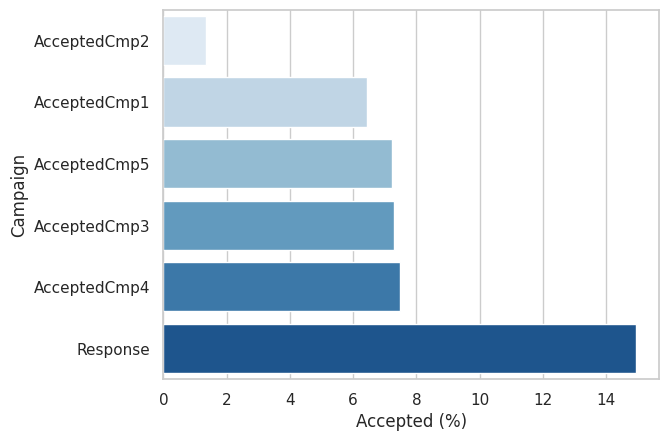

In [37]:
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')


In [38]:
cam_success

,index,Percent
0,AcceptedCmp1,6.437193
1,AcceptedCmp2,1.341082
2,AcceptedCmp3,7.286544
3,AcceptedCmp4,7.465355
4,AcceptedCmp5,7.241842
5,Response,14.930711


### trung bình khách hàng của công ty này ra sao?

In [39]:
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']

mnt_cols = [col for col in df.columns if 'Mnt' in col]

channel_cols = [col for col in df.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAcc']

In [40]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Dependents', 'Year_Customer',
       'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc'],
      dtype='object')

In [41]:
demographics = pd.DataFrame(round(df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

,Average
Year_Birth,1968.9
Year_Customer,2013.0
Income,52227.4
Dependents,1.0
Kidhome,0.4
Teenhome,0.5
Recency,49.1


###Sản phầm nào được ưa chuộng nhât?



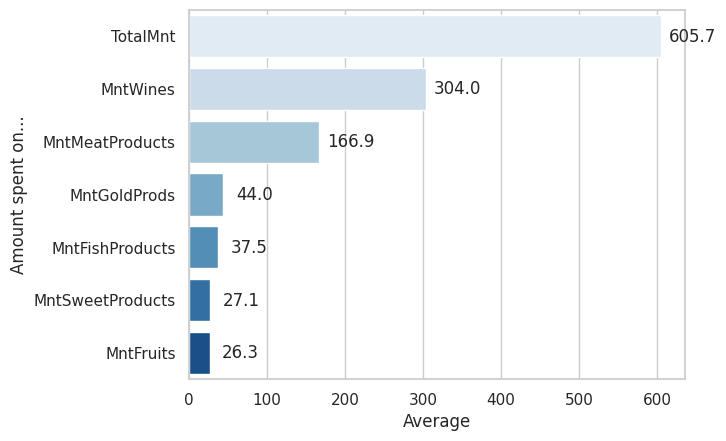

In [42]:
spending = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average', ascending = False).reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amount spent on...')

for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

* Wines đang là sản phẩm được ưa chuộng nhất

### Kênh bán hàng nào đang hoạt động không tốt?



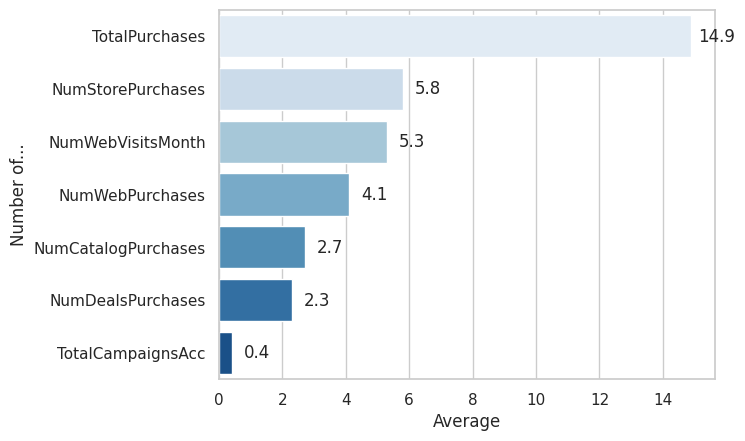

In [43]:
channels = pd.DataFrame(round(df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average', ascending = False).reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Number of...')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

* Các chanels phát triển chậm như campaign, deals và catalog